In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [445]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [446]:
data = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv')

In [447]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [448]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [449]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [450]:
data.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [451]:
data.shape

(8760, 14)

In [452]:
from datetime import datetime
data['Date'] = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [453]:
data["Month"]=pd.DatetimeIndex(data['Date']).month
data["Year"]=pd.DatetimeIndex(data['Date']).year
data["tday"]=pd.DatetimeIndex(data['Date']).day

In [454]:
data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [455]:
data['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [456]:
data['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [457]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [458]:
data.corr()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,tday
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,7.086107e-02,0.215162,4.684885e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,2.684858e-18,0.000000,1.598551e-19
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,4.968327e-02,0.377796,8.090791e-02
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,4.779778e-02,0.035925,7.047359e-03
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-8.206909e-02,-0.003781,-6.123440e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,7.788783e-02,0.052381,-1.068595e-01
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.510073e-02,0.336350,6.970777e-02
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.041240e-02,0.128086,-3.445555e-03
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-2.279368e-02,0.027522,1.199827e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.475846e-02,-0.206418,1.014355e-01


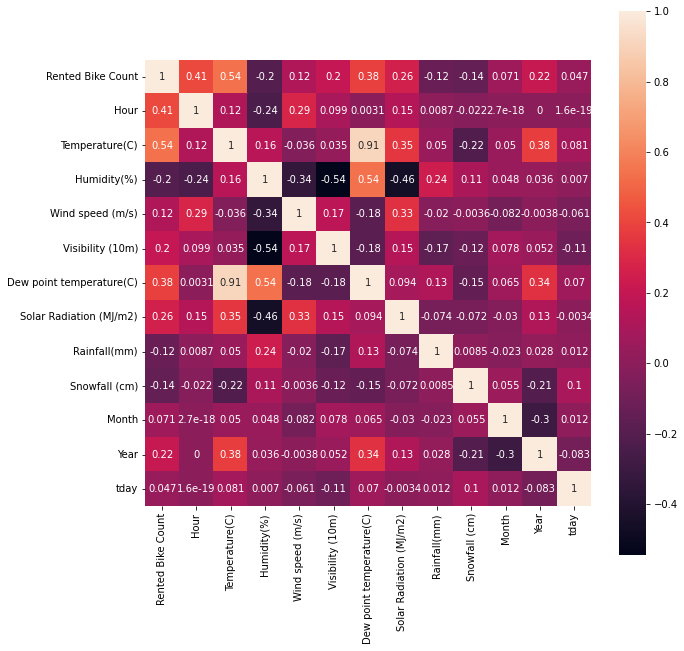

In [459]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,square=True)
plt.show()

In [460]:
df=data.select_dtypes(include='object')
df.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [461]:
df1=data
for m in df:
  dummies =pd.get_dummies(data[m],drop_first=True)
  df1 = pd.concat([df1,dummies],axis='columns')

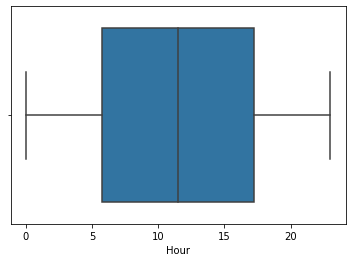

In [462]:
sns.boxplot(data['Hour'])

In [463]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Year', 'tday'],
      dtype='object')

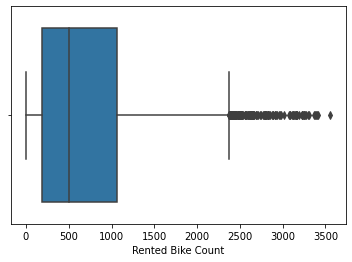

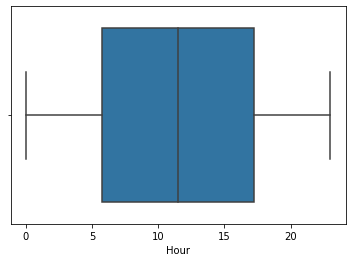

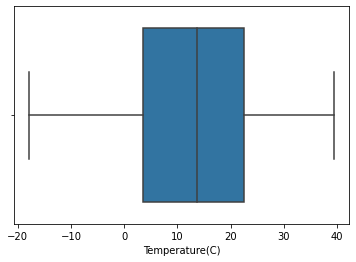

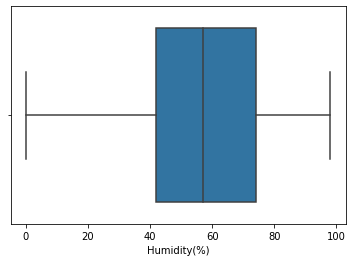

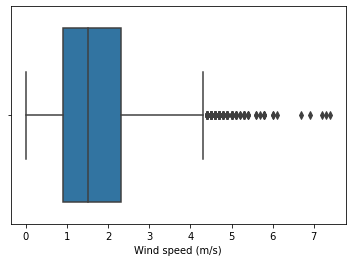

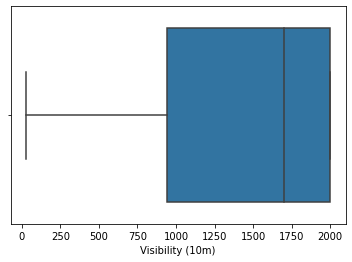

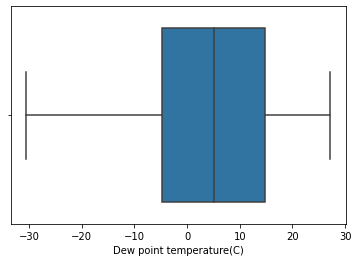

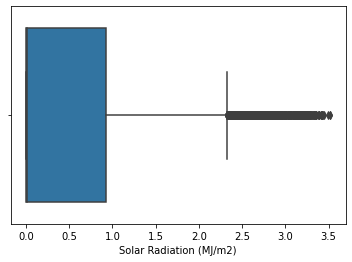

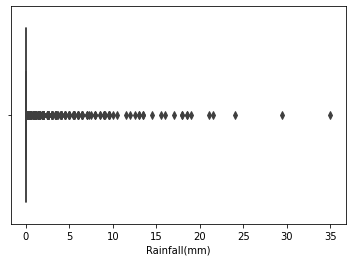

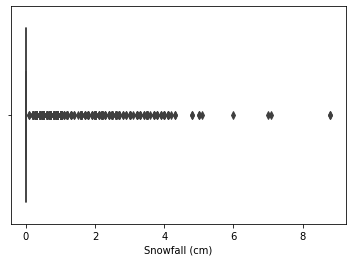

In [464]:
cols = [ 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'
        ]

for col in cols:
  plt.figure()
  sns.boxplot(data=df1,x=col)

In [465]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Year', 'tday'],
      dtype='object')

In [466]:

Q1 = np.percentile(data['Wind speed (m/s)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Wind speed (m/s)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Wind speed (m/s)'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.1999999999999997
upper limit: 4.3999999999999995


In [467]:
data = data[data['Wind speed (m/s)']< up_lim]

In [468]:
Q1 = np.percentile(data['Solar Radiation (MJ/m2)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Solar Radiation (MJ/m2)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Solar Radiation (MJ/m2)'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.35
upper limit: 2.25


In [469]:
data = data[data['Solar Radiation (MJ/m2)']< up_lim]

In [470]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12


In [471]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday,Spring,Summer,Winter,No Holiday,Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1


In [472]:
df1 = df1.drop(['Date','Seasons','Holiday','Functioning Day','Rainfall(mm)'],axis=1)

In [473]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Snowfall (cm)             8760 non-null   float64
 9   Month                     8760 non-null   int64  
 10  Year                      8760 non-null   int64  
 11  tday                      8760 non-null   int64  
 12  Spring                    8760 non-null   uint8  
 13  Summer                    8760 non-null   uint8  
 14  Winter  

In [485]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df1)

StandardScaler()

In [486]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df1, test_size=0.25)

In [487]:
train_x = train.drop(['Rented Bike Count'],axis=1)
train_y = train['Rented Bike Count']

val_x = val.drop(['Rented Bike Count'],axis = 1)
val_y = val['Rented Bike Count']

In [488]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (6570, 16)
Dimension of train_y dataframe: (6570,)
Dimension of val_x dataframe: (2190, 16)
Dimension of val_y dataframe: (2190,)


In [489]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [490]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
df_pred = lr.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 321.5948846054218
Mean Square Error of linear regression: 185863.66232172732
R_Squared Score of linear regression: 0.12316840664786188


In [491]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge
ridge.fit(train_x,train_y)
rp=ridge.predict(val_x)
ridge_score = ridge.score(val_x,val_y)

ridge.coef_
print("Ridge:")
print("R-square score:", r2_score(rp,val_y))
print("Training score",ridge_score)

Ridge:
R-square score: 0.1219474380752319
Training score 0.5442256667807205


In [492]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso
lasso.fit(train_x,train_y)
ls = lasso.predict(val_x)
lasso_score = lasso.score(val_x,val_y)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_
print("training score",lasso_score)
print("number of feature used:",coeff_used)
print(r2_score(ls,val_y))

training score 0.5431995544466364
number of feature used: 16
0.10524047562970851


In [494]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lasso,val_x,val_y, cv=13)
print(cvs.mean())
cvs

0.5397337587778073


array([0.54457501, 0.52341927, 0.53695626, 0.59108124, 0.55867399,
       0.59897486, 0.55071796, 0.49154962, 0.4859602 , 0.58363678,
       0.53972356, 0.59935926, 0.41191085])